In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sys.path.append(os.path.join('..'))
from adp.curve import * 
from adp.utility import *
from adp.plot import *
from adp.funcs import *
from adp.optim import *

Automatic pdb calling has been turned ON


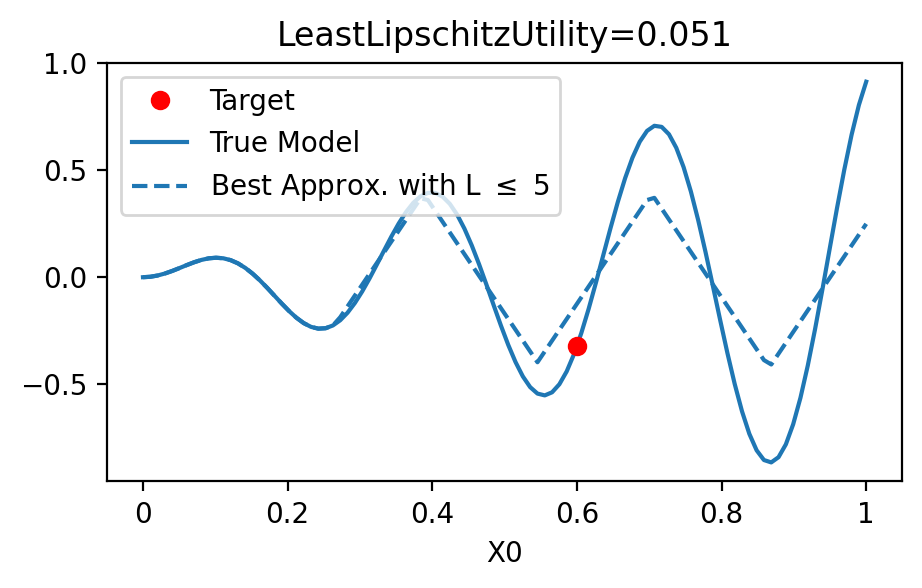

In [2]:
%pdb on
# Model and parameter setup
def model(x):
    return np.mean(x * np.sin(x * 20), axis=1)
x0 = np.array([0.6])
L = 5

# Setup curve
v = np.array([1])
X = np.linspace(0, 1, num=100).reshape(-1,1)
curve = CategoricalLinearCurve(x0, v, density_estimator=None, dtypes=[float])
curve.fit(X) # Fit bounds

# Setup utility
utility = LeastLipschitzUtility(model, lipschitz_constant=L)

# Plot figure
plt.figure(figsize=np.array([6,3.8])*0.8, dpi=200)
ax = plt.gca()
plot_curve_vals(curve, utility=utility, n_grid=100, 
                model_label='True Model', 
                other_model_label='Best Approx. with L $\leq$ %g' % L,
                ax=ax)

plt.savefig('best-lipschitz-illustration-utility.pdf', bbox_inches='tight', pad_inches=0)